# Comparing Accuracy for Training and Test Datasets

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

####[CAT-01]
Import modules and set the random seed.

In [1]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import models

np.random.seed(20160531)

Using TensorFlow backend.


####[CAT-02]
Generate a dateset and split them into training(80%) and test datasets(20%).

In [0]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x', 'y'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x', 'y'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

####[CAT-04]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [0]:
train_x = train_set[['x', 'y']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])
test_x = test_set[['x', 'y']].as_matrix()
test_t = test_set['t'].as_matrix().reshape([len(test_set), 1])

####[CAT-05]
Define a model to predict the probability of `t=1`.

In [4]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,),
                       name='logistic_regression'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


####[CAT-06]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

####[CAT-07]
Apply the optimization for 10 epochs.

In [6]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=64, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 0s 161us/step - loss: 3.3656 - acc: 0.5027 - val_loss: 3.4741 - val_acc: 0.4607
Epoch 2/10
1120/1120 [==============================] - 0s 26us/step - loss: 3.1970 - acc: 0.5098 - val_loss: 3.2966 - val_acc: 0.4643
Epoch 3/10
1120/1120 [==============================] - 0s 26us/step - loss: 3.0305 - acc: 0.5232 - val_loss: 3.1271 - val_acc: 0.4571
Epoch 4/10
1120/1120 [==============================] - 0s 23us/step - loss: 2.8763 - acc: 0.5277 - val_loss: 2.9687 - val_acc: 0.4571
Epoch 5/10
1120/1120 [==============================] - 0s 31us/step - loss: 2.7364 - acc: 0.5286 - val_loss: 2.8237 - val_acc: 0.4607
Epoch 6/10
1120/1120 [==============================] - 0s 25us/step - loss: 2.6071 - acc: 0.5277 - val_loss: 2.6966 - val_acc: 0.4607
Epoch 7/10
1120/1120 [==============================] - 0s 25us/step - loss: 2.4961 - acc: 0.5

####[CAT-08]
Apply the optimization for additional 5,000 epochs.

In [0]:
history = model.fit(train_x, train_t,
                    validation_data=(test_x, test_t),
                    batch_size=64, epochs=500, verbose=0)

####[CAT-09]
Plot a chart to compare the accuracy for training and test datasets.

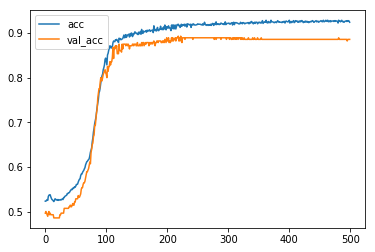

In [8]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()